In [33]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# null hypothesis- one categorical
# from scipy import stats

# F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['alcohol'],
# red_wine[red_wine['quality_label'] == 'medium']['alcohol'],
# red_wine[red_wine['quality_label'] == 'high']['alcohol'])
# print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
# print('F Statistic:', F, '\tp-value:', p)

## Data Preparatrion

In [35]:
red_wine_heatmap = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine_heatmap = pd.read_csv('winequality-white.csv', sep=';')

In [36]:
white_wine_heatmap

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [37]:
white_wine_heatmap.drop_duplicates(inplace=True)
red_wine_heatmap.drop_duplicates(inplace=True)
white_wine_heatmap.reset_index(inplace=True)
red_wine_heatmap.reset_index(inplace=True)
red_wine_heatmap.drop(columns='index', inplace=True)
white_wine_heatmap.drop(columns='index', inplace=True)

In [38]:
white_wine_heatmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 371.5 KB


In [39]:
# add column wine type
red_wine_heatmap['wine type']='red'
white_wine_heatmap['wine type']='white'
wine=pd.concat([red_wine_heatmap, white_wine_heatmap], ignore_index=True)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [40]:
numeric_wine=wine.iloc[:, 0:12]
corr=numeric_wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884


### Add quality label

In [41]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
wine['quality label'] = wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
wine['quality label'] = pd.Categorical(wine['quality label'],
categories=['low', 'medium', 'high'])
# wine.drop('quality_label',inplace=True, axis=1)

In [42]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,quality label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low


Text(0.48, 0.99, 'Alcohol to Quality')

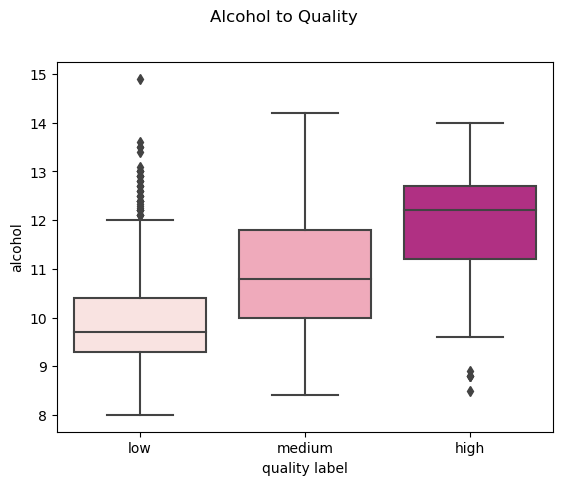

In [43]:
gabi_red=['#fde0dd', '#fa9fb5', '#c51b8a']
gabi_white=['papayawhip', 'navajowhite', 'orange']
sns.boxplot(x = "quality label" , y = "alcohol", data = wine, palette=gabi_red)
plt.suptitle('Alcohol to Quality', x=0.48, y=0.99, color='black')




Text(0.48, 0.99, 'Density to Quality')

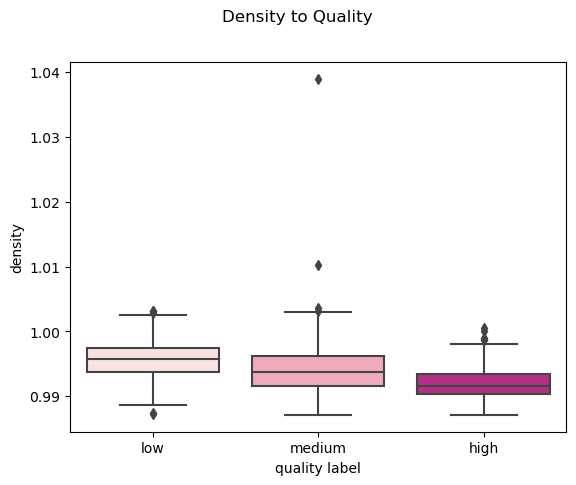

In [44]:
gabi_red=['#fde0dd', '#fa9fb5', '#c51b8a']
gabi_white=['papayawhip', 'navajowhite', 'orange']
sns.boxplot(x = "quality label" , y = "density", data = wine, palette=gabi_red)
plt.suptitle('Density to Quality', x=0.48, y=0.99, color='black')



Text(0.48, 0.99, 'Volatile Acidity to Quality')

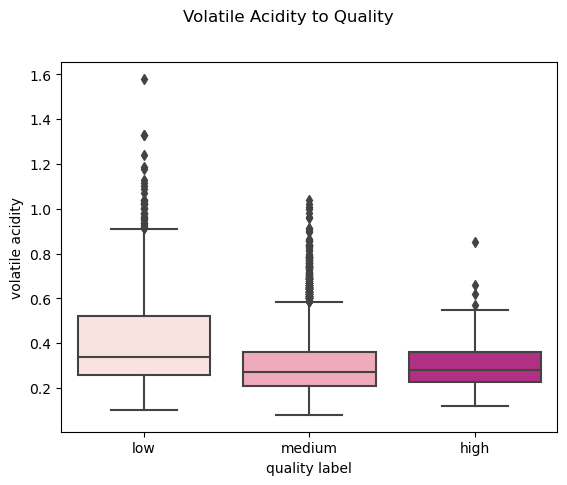

In [45]:
gabi_red=['#fde0dd', '#fa9fb5', '#c51b8a']
gabi_white=['papayawhip', 'navajowhite', 'orange']
sns.boxplot(x = "quality label" , y = "volatile acidity", data = wine, palette=gabi_red)
plt.suptitle('Volatile Acidity to Quality', x=0.48, y=0.99, color='black')

In [46]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine_heatmap['quality label'] = red_wine_heatmap['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine_heatmap['quality label'] = pd.Categorical(red_wine_heatmap['quality label'],
categories=['low', 'medium', 'high'])


In [47]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine_heatmap['quality label'] = white_wine_heatmap['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine_heatmap['quality label'] = pd.Categorical(white_wine_heatmap['quality label'],
categories=['low', 'medium', 'high'])

# hypothesis check

In [48]:
from scipy import stats

In [49]:
def anova_tests2(df):  
    
    features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    
    for feature in features:
        F, p = stats.f_oneway(
            df[df['quality label'] == 'low'][feature],
            df[df['quality label'] == 'medium'][feature],
            df[df['quality label'] == 'high'][feature]
        )
        if p > 0.05:
         print(f"ANOVA test for mean {feature} across wine samples with different quality ratings")
         print('F Statistic:', F, '\tp-value:', p)
        else:
         print("there is correlation")

In [50]:
anova_tests2(red_wine_heatmap)


there is correlation
there is correlation
there is correlation
ANOVA test for mean residual sugar across wine samples with different quality ratings
F Statistic: 0.018769916621439144 	p-value: 0.9814053962580443
there is correlation
there is correlation
there is correlation
there is correlation
ANOVA test for mean pH across wine samples with different quality ratings
F Statistic: 0.4933049630979343 	p-value: 0.6107145654590622
there is correlation
there is correlation


In [51]:
anova_tests2(white_wine_heatmap)

there is correlation
there is correlation
ANOVA test for mean citric acid across wine samples with different quality ratings
F Statistic: 0.24868681586895755 	p-value: 0.7798363477964527
there is correlation
there is correlation
ANOVA test for mean free sulfur dioxide across wine samples with different quality ratings
F Statistic: 0.11569157788750334 	p-value: 0.8907529199895233
there is correlation
there is correlation
there is correlation
there is correlation
there is correlation


In [52]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine_heatmap['quality label'] = red_wine_heatmap['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine_heatmap['quality label'] = pd.Categorical(red_wine_heatmap['quality label'],
categories=['low', 'medium', 'high'])

In [53]:
numeric_white_wine=white_wine_heatmap.iloc[:, 0:13]
corr_white=numeric_wine.corr()
corr_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884


In [54]:
import numpy as np

In [55]:
numeric_red_wine=red_wine_heatmap.iloc[:,0:12]
corr_red=numeric_red_wine.corr()
corr_red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [56]:
wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,quality label
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


# Models

## Logistic Regression Mathod

In [57]:
# changing wine type to 0 and 1
wine1=wine.copy()

In [58]:
wine1['wine type'].replace(['red', 'white'],
                        [0, 1], inplace=True)

In [59]:
from sklearn.preprocessing import OrdinalEncoder
# Create an instance of OrdinalEncoder

In [60]:
ordinal_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
wine1['NumericalLabels'] = ordinal_encoder.fit_transform(wine1[['quality label']])

In [61]:
wine1.drop(columns='quality', inplace=True)

In [62]:
wine1.tail(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type,quality label,NumericalLabels
5220,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.80,1,high,2.0
5221,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.80,1,high,2.0
5222,5.5,0.620,0.33,1.7,0.037,24.0,118.0,0.98758,3.15,0.39,13.55,1,medium,1.0
5223,6.2,0.300,0.42,2.2,0.036,28.0,128.0,0.99010,3.13,0.38,11.60,1,medium,1.0
5224,4.7,0.785,0.00,3.4,0.036,23.0,134.0,0.98981,3.53,0.92,13.80,1,medium,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.20,1,medium,1.0
5316,6.6,0.320,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.60,1,low,0.0
5317,6.5,0.240,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.40,1,medium,1.0
5318,5.5,0.290,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.80,1,medium,1.0


In [63]:
wine1.drop(columns='quality label', inplace=True)

In [64]:
wine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  wine type             5320 non-null   int64  
 12  NumericalLabels       5320 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 540.4 KB


In [65]:
wine1.drop(columns='wine type', inplace=True)

In [66]:
#functions for finding outliers
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [67]:
#functions for removing outliers by column
def remove_outliers(column):
    mean_value = column.mean()
    std_dev = column.std()
    threshold = 3 * std_dev
    outliers_mask = (column - mean_value).abs() > threshold
    return column[~outliers_mask]



In [68]:
upper_limit = wine1['alcohol'].mean() + 3*wine1['alcohol'].std()

print(upper_limit)

lower_limit = wine1['alcohol'].mean() - 3*wine1['alcohol'].std()

print(lower_limit)

14.107040012832858
6.991442443307492


In [69]:
wine1['alcohol'] = np.where(wine1['alcohol'] > upper_limit,

   upper_limit,

   np.where(

       wine1[''] < lower_limit,

       lower_limit,

       df[‘fare_amount’]

   )

)

SyntaxError: invalid character '‘' (U+2018) (3316475913.py, line 1)

In [ ]:
# Apply the remove_outliers function to each column in the DataFrame
wine2 = wine1.apply(remove_outliers, axis=0)

# Now df_no_outliers contains the DataFrame without outliers in all columns

In [ ]:
wine3=wine2.dropna().reset_index(drop=True)

In [ ]:
wine2=wine2.dropna().reset_index(drop=True)

In [ ]:
wine4=wine2.dropna().reset_index(drop=True)

In [ ]:
wine4.shape

(4889, 12)

divide into train and test

In [ ]:
#importm library for dicidint the dataset into two 
from sklearn.model_selection import train_test_split

In [ ]:
wine1.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,NumericalLabels
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0


In [ ]:
wine3.drop(columns='NumericalLabels', inplace=True)

In [ ]:
wine3.shape

(4889, 11)

In [ ]:
wine4.shape

(4889, 12)

In [ ]:
X=wine3

In [ ]:

y = wine4['NumericalLabels']  # --> what you're trying to predict
  # --> the features we will keep to build our model





In [ ]:
X.shape

(4889, 11)

In [ ]:
y.shape

(4889,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [ ]:
y_test.shape

(978,)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3911, 11) (978, 11) (3911,) (978,)


In [ ]:
#building model Logistic Regression

from sklearn.linear_model import LogisticRegression

In [ ]:
logistics_regression_model=LogisticRegression(random_state=52)

In [ ]:
#fit the model
logistics_regression_model.fit(X_train, y_train)

c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=52)

In [ ]:
# prediction
predictions=logistics_regression_model.predict(X_test)

In [ ]:
predictions

array([1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc=accuracy_score(y_test, predictions)
acc

0.6973415132924335

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

Accuracy: 0.6973415132924335

Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.55      0.59       350
         1.0       0.72      0.83      0.77       593
         2.0       0.00      0.00      0.00        35

    accuracy                           0.70       978
   macro avg       0.46      0.46      0.45       978
weighted avg       0.67      0.70      0.68       978


Confusion Matrix:
[[191 159   0]
 [102 491   0]
 [  1  34   0]]


c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
RF_model= RandomForestClassifier(n_estimators= 100, criterion='entropy', random_state=445)

In [ ]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=445)

In [ ]:
preds2= RF_model.predict(X_test)

In [ ]:
preds2

array([1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0.

In [ ]:
acc=accuracy_score(y_test, preds2)
acc

0.7535787321063395

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
accuracy = accuracy_score(y_test, preds2)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, preds2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, preds2))

Accuracy: 0.7535787321063395

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.67      0.69       350
         1.0       0.77      0.85      0.81       593
         2.0       0.00      0.00      0.00        35

    accuracy                           0.75       978
   macro avg       0.50      0.51      0.50       978
weighted avg       0.72      0.75      0.74       978


Confusion Matrix:
[[234 116   0]
 [ 90 503   0]
 [  1  34   0]]


c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [ ]:
k = 3  # You can adjust this value based on your problem
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train1, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_model.predict(X_test1)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7004089979550102

Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.60      0.61       350
         1.0       0.74      0.80      0.77       593
         2.0       0.43      0.09      0.14        35

    accuracy                           0.70       978
   macro avg       0.60      0.49      0.51       978
weighted avg       0.69      0.70      0.69       978


Confusion Matrix:
[[209 140   1]
 [117 473   3]
 [  4  28   3]]
